In [11]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import torch.optim as optim
%matplotlib inline

In [12]:
mytransform = transforms.Compose([transforms.ToTensor(),
                    transforms.Normalize((0.7,), (0.7,))
                    ])     
train_set = datasets.MNIST(root = './data', train = True, transform = mytransform, download = True)
test_set = datasets.MNIST(root = './data', train = False, transform = mytransform, download = True)


In [13]:

split = 0.8
small_portion = 0.3
train_size = int(train_set.__len__() * small_portion)
rest = int(train_set.__len__()) - train_size 
train_set, _ = random_split(train_set, [train_size, rest])

train_size = int(train_set.__len__() * split)
val_size = int(train_set.__len__()) - train_size
train, val = random_split(train_set, [train_size, val_size])
train_loader = DataLoader(train, batch_size=32, shuffle=True)
val_loader = DataLoader(val, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_set, batch_size = 32, shuffle=False) 

In [14]:
iterator = iter(train_loader)
batch = next(iterator)
x, y = batch
print(x.shape)
print(y.shape)



torch.Size([32, 1, 28, 28])
torch.Size([32])


(28, 28)


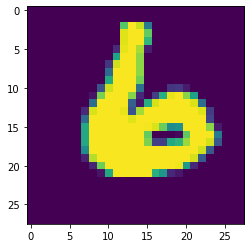

In [15]:
image = x[0].squeeze().numpy()
print(image.shape)
plt.imshow(image)

In [16]:

class mnistCNN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.convLayer = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=3, dilation=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(6, 12, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )
        self.linerLayer = nn.Sequential(
            nn.Linear(1728, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax(dim=1)
        )
    def forward(self, x):
        x = self.convLayer(x)
        x = x.view(-1, 1728)
        x = self.linerLayer(x)
        return x

        


In [17]:
model = mnistCNN()
z = model(x)
print(z.shape)
a = z.sum(dim=1)
print(a)
print(a.shape)

torch.Size([32, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)
torch.Size([32])


In [18]:
model = mnistCNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
max_epochs = 5
from Trainer import trainer

model_trainer = trainer(model, optimizer, loss_fn, train_loader, val_loader, test_loader, max_epochs)




In [19]:
model_trainer.fit()


1.6103676557540894  ,  1.6148325204849243
1.5821555852890015  ,  1.5865709781646729


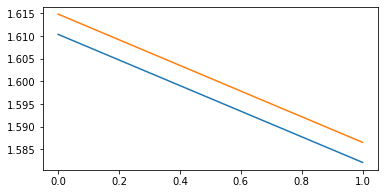

In [20]:
model_trainer.plot()

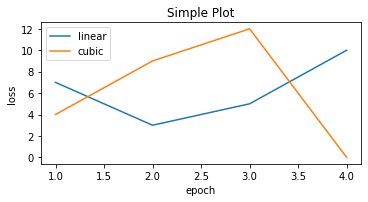

In [35]:


a = list(range(1,5))
b = np.array([7,3,5,10])
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(a, b, label='linear')
c = np.array([4, 9 , 12, 0])
plt.plot(a, c, label='cubic')
plt.xlabel('epoch')
plt.ylabel("loss")
plt.title("Simple Plot")
plt.legend()